# Direto ao Ponto
## Dados com a Debs 
## Aula 1
### Exploração de dados

# 1  O que é exploração de dados?
## Data Analysis
## EDA - Exploratory Data Analysis 

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [14]:
# mudar aqui para baixa programaticamente
# source: https://dados.gov.br/dados/conjuntos-dados/pesquisa-de-satisfacao-do-passageiro-em-aeroportos
# o arquivo que tem todos os dados esta em formato de tab
# eu baixei e exportei a primeira tab com os dados e passei pra csv
# a segunda tab é metadados: importante
air_sat = pd.read_csv("aula_1_satisfacao_passageiro.csv")

C:\Users\dmaiasil\AppData\Local\Temp\ipykernel_22636\1376120422.py:3: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  air_sat = pd.read_csv("aula_1_satisfacao_passageiro.csv")


In [ ]:
# Obs.: vai até 2019, entao ANTES do COVID. 

# DICA!
Nomenclatura de dados: vocês veram muitos examplos com "df"(DataFrame), data, data1, etc; porém, na realidade, é importante nomear suas variáveis adequadamente. Assim, conforme sua análise vai se aprofundando, o programador facilmente entende o que foi feito previamente.

In [15]:
air_sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483707 entries, 0 to 483706
Data columns (total 51 columns):
 #   Column                                                                      Non-Null Count   Dtype 
---  ------                                                                      --------------   ----- 
 0   SIGLA AEROPORTO                                                             483707 non-null  object
 1   TIPO DE VOO                                                                 483707 non-null  object
 2   DATA DA COLETA                                                              483707 non-null  object
 3   MÊS                                                                         483707 non-null  object
 4   TRIMESTRE                                                                   483707 non-null  object
 5   FACILIDADE DE EMBARQUE / DESEMBARQUE NO MEIO-FIO                            189559 non-null  object
 6   TEMPO DE FILA NA INSPEÇÃO DE SEGURANÇA      

# ~500000 pontos de entrada: isso é muito ou pouco?
# 51 colunas: o que pensar sobre isso?

In [16]:
# checando elementos null por coluna
air_sat.isnull().sum(axis = 0)

SIGLA AEROPORTO                                                                    0
TIPO DE VOO                                                                        0
DATA DA COLETA                                                                     0
MÊS                                                                                0
TRIMESTRE                                                                          0
FACILIDADE DE EMBARQUE / DESEMBARQUE NO MEIO-FIO                              294148
TEMPO DE FILA NA INSPEÇÃO DE SEGURANÇA                                        237795
CONFIABILIDADE DA INSPEÇÃO DE SEGURANÇA                                       239011
CORDIALIDADE E PRESTATIVIDADE DOS FUNCIONÁRIOS DA INSPEÇÃO DE SEGURANÇA       238042
QUALIDADE DA SINALIZAÇÃO DO AEROPORTO                                         142386
DISPONIBILIDADE E QUALIDADE DAS INFORMAÇÕES NOS PAINÉIS  DE VOO               144327
DISPONIBILIDADE DE TOMADAS                                       

In [17]:
# percentagem de nulls por coluna
air_sat.isnull().mean() * 100

SIGLA AEROPORTO                                                                0.000000
TIPO DE VOO                                                                    0.000000
DATA DA COLETA                                                                 0.000000
MÊS                                                                            0.000000
TRIMESTRE                                                                      0.000000
FACILIDADE DE EMBARQUE / DESEMBARQUE NO MEIO-FIO                              60.811194
TEMPO DE FILA NA INSPEÇÃO DE SEGURANÇA                                        49.160959
CONFIABILIDADE DA INSPEÇÃO DE SEGURANÇA                                       49.412351
CORDIALIDADE E PRESTATIVIDADE DOS FUNCIONÁRIOS DA INSPEÇÃO DE SEGURANÇA       49.212023
QUALIDADE DA SINALIZAÇÃO DO AEROPORTO                                         29.436415
DISPONIBILIDADE E QUALIDADE DAS INFORMAÇÕES NOS PAINÉIS  DE VOO               29.837691
DISPONIBILIDADE DE TOMADAS      

# O que significa um elemento NULL? NaN? NA?
# DICA!
Não há um padrão para caracterizar um elemento como NULL. Em algums datasets, pode ser algo como -9999, 00000, ou outro tipo de "flag", que para aquele conjunto de dados, faz sentido. Tecnicamente, isso era para estar claro no arquivo de metadados, mas a realidade é que:
1. Nem todo banco de dados tem metadados;
2. Nem sempre o arquivo de metadados está atualizado;

É nosso dever reconhecer e catalogar dados NULLs

# DICA!
Sabe aquele ditado, "fatos não mentem?" Sinto lhe informar que, as fezes, dados mentem! Não que os valores que estamos vendo estão incorretos, mas a interpretação e fonte de dados podem ser enviesados, ou seja, sofrer de bias. 
Nos dados que estamos vendo, qual um tipo de bias que pode ocorrer?


É sua responsabilidade saber as limitações de seus dados, e ser crítico de quais inferências podem ser feitas

# Bias exploration
## um pergunta que você pode fazer: dos dados, qual é a representação dos aeroportos?

In [20]:
# valores totais
# air_sat["SIGLA AEROPORTO"].value_counts(sort=True) 
# representaçao em %
air_sat["SIGLA AEROPORTO"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

SBGR    10.9%
SBGL    10.2%
SBSV     6.4%
SBBR     6.4%
SBEG     6.0%
SBCF     5.9%
SBKP     5.8%
SBPA     5.7%
SBRF     5.6%
SBCT     5.2%
SBFZ     5.2%
SBSP     4.2%
SBCY     4.2%
SBRJ     3.9%
SBSG     3.6%
SBBE     2.3%
SBFL     2.1%
SBGO     1.9%
SBVT     1.7%
SBMO     1.6%
SBNT     1.1%
Name: SIGLA AEROPORTO, dtype: object

# DICA!
Seja pro ativo! Imagine você mostrando um slide com todas essas siglas para a empresa que te contratou. Talvez sim, todos sejam muito familiares e saibam que SBBR é o AEROPORTO INTERNACIONAL JUSCELINO KUBITSCHEK - BRASÍLIA, porém, é nosso objetivo fazer com que as informações que extraírmos dos dados sejam FACILMENTE interpretadas. Como fazer slides é assunto para outra aula, mas sempre exponha conceitos de modo simples, claro, e ojetivo.

Então o que fazer?

No dados originais de metadados, tem uma lista com o nome dos aeroportos e suas siglas. Criei um novo arquivo com esses valores, e vamos importar e merge com os dados que temos para sabermos, de forma simples, clara, e objetiva, de quais aeroportos nossos dados estão vindo. 

In [45]:
air_nomes = pd.read_csv("aeroportos_nomes.csv")

In [22]:
# checando dados importados
air_nomes

,AEROPORTOS,Nome Aeroporto
0,SBBE,AEROPORTO INTERNACIONAL JÚLIO CEZAR RIBEIRO - ...
1,SBBR,AEROPORTO INTERNACIONAL JUSCELINO KUBITSCHEK -...
2,SBCF,AEROPORTO INTERNACIONAL TANCREDO NEVES - CONFI...
3,SBCT,AEROPORTO INTERNACIONAL AFONSO PENA - CURITIBA...
4,SBCY,AEROPORTO INTERNACIONAL MARECHAL RONDON - CUIA...
5,SBEG,AEROPORTO INTERNACIONAL EDUARDO GOMES - MANAUS...
6,SBFL,AEROPORTO INTERNACIONAL HERCÍLIO LUZ - FLORIAN...
7,SBFZ,AEROPORTO INTERNACIONAL PINTO MARTINS - FORTAL...
8,SBGL,AEROPORTO INTERNACIONAL DO GALEÃO - RIO DE JAN...
9,SBGO,AEROPORTO SANTA GENOVEVA - GOIÂNIA (SBGO)


# Criando uma nova coluna
Irei detalhar mais a frente o que "feature engineering" significa, mas para essa primeira aula, vamos dizer que quanto mais informação você conseguir criar de seus dados, mais completa sua análise será. Não adianta criar dados inúteis, mas dados significativos fazem muito a diferença. Nesse caso, vamos adicionar os nomes dos aeroportos para melhor entender sua distribuição.

In [46]:
# merge
# renomeando chaves (keys)
# estevao pode entrar com explicação de merge simples
air_nomes = air_nomes.rename(columns={'AEROPORTOS': 'SIGLA AEROPORTO'})
air_sat_nm = air_sat.merge(air_nomes, how='outer', on='SIGLA AEROPORTO')

In [28]:
# logic checks after merge
len(air_sat)

483707

In [29]:
len(air_sat_nm)

483707

In [30]:
# os valores não estão iguais ao que vimos na sigla. O que está acontecendo? 
air_sat_nm["Nome Aeroporto"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

AEROPORTO INTERNACIONAL GOV. ANDRÉ FRANCO MONTORO/GUARULHOS - SÃO PAULO (SBGR)    11.0%
AEROPORTO INTERNACIONAL DO GALEÃO - RIO DE JANEIRO (SBGL)                         10.3%
AEROPORTO INTERNACIONAL LUIZ EDUARDO MAGALHÃES - SALVADOR (SBSV)                   6.5%
AEROPORTO INTERNACIONAL JUSCELINO KUBITSCHEK - BRASÍLIA (SBBR)                     6.5%
AEROPORTO INTERNACIONAL EDUARDO GOMES - MANAUS (SBEG)                              6.1%
AEROPORTO INTERNACIONAL TANCREDO NEVES - CONFINS (SBCF)                            6.0%
AEROPORTO INTERNACIONAL DE VIRACOPOS - CAMPINAS (SBKP)                             5.9%
AEROPORTO INTERNACIONAL SALGADO FILHO - PORTO ALEGRE (SBPA)                        5.8%
AEROPORTO INTERNACIONAL GILBERTO FREYRE - RECIFE (SBRF)                            5.6%
AEROPORTO INTERNACIONAL AFONSO PENA - CURITIBA (SBCT)                              5.2%
AEROPORTO INTERNACIONAL PINTO MARTINS - FORTALEZA (SBFZ)                           5.2%
AEROPORTO DE CONGONHAS - SÃO PAU

In [35]:
# há nulls no nomes. O que isso quer dizer?
air_sat_nm.isnull().mean() * 100

SIGLA AEROPORTO                                                                0.000000
TIPO DE VOO                                                                    0.000000
DATA DA COLETA                                                                 0.000000
MÊS                                                                            0.000000
TRIMESTRE                                                                      0.000000
FACILIDADE DE EMBARQUE / DESEMBARQUE NO MEIO-FIO                              60.811194
TEMPO DE FILA NA INSPEÇÃO DE SEGURANÇA                                        49.160959
CONFIABILIDADE DA INSPEÇÃO DE SEGURANÇA                                       49.412351
CORDIALIDADE E PRESTATIVIDADE DOS FUNCIONÁRIOS DA INSPEÇÃO DE SEGURANÇA       49.212023
QUALIDADE DA SINALIZAÇÃO DO AEROPORTO                                         29.436415
DISPONIBILIDADE E QUALIDADE DAS INFORMAÇÕES NOS PAINÉIS  DE VOO               29.837691
DISPONIBILIDADE DE TOMADAS      

In [36]:
# Há uma sigla sem nome na lista oferecida. Isso é um exemplo de como os
# metadados nem sempre estão atualizados.
# O que fazer?
air_sat_nm[air_sat_nm["Nome Aeroporto"].isnull()]["SIGLA AEROPORTO"].value_counts()

SBNT    5380
Name: SIGLA AEROPORTO, dtype: int64

In [47]:
# vamos adicionar esse aeroporto em nossa lista e refazer o merge! 
# wikipedia nos diz que SBNT é Aeroporto Internacional Augusto Severo - NATAL 
# (Por mais que nao seja exatamente na cidade de Natal, essa é a referência)

# lembra da nossa fonte de dados dos nomes e siglas?
# using pd.concat since it's more efficient for large dataframes
# estevao pode entrar aqui com mais dicas 
sigla_natal = pd.DataFrame([["SBNT", "AEROPORTO INTERNACIONAL AUGUSTO SEVERO - NATAL (SBNT)"]], columns=["SIGLA AEROPORTO", "Nome Aeroporto"])
air_nomes = pd.concat([air_nomes, sigla_natal], ignore_index=True)
air_nomes

,SIGLA AEROPORTO,Nome Aeroporto
0,SBBE,AEROPORTO INTERNACIONAL JÚLIO CEZAR RIBEIRO - ...
1,SBBR,AEROPORTO INTERNACIONAL JUSCELINO KUBITSCHEK -...
2,SBCF,AEROPORTO INTERNACIONAL TANCREDO NEVES - CONFI...
3,SBCT,AEROPORTO INTERNACIONAL AFONSO PENA - CURITIBA...
4,SBCY,AEROPORTO INTERNACIONAL MARECHAL RONDON - CUIA...
5,SBEG,AEROPORTO INTERNACIONAL EDUARDO GOMES - MANAUS...
6,SBFL,AEROPORTO INTERNACIONAL HERCÍLIO LUZ - FLORIAN...
7,SBFZ,AEROPORTO INTERNACIONAL PINTO MARTINS - FORTAL...
8,SBGL,AEROPORTO INTERNACIONAL DO GALEÃO - RIO DE JAN...
9,SBGO,AEROPORTO SANTA GENOVEVA - GOIÂNIA (SBGO)


In [48]:
# merge completo
air_sat_nm = air_sat.merge(air_nomes, how='outer', on='SIGLA AEROPORTO')

In [49]:
# Agora sim! os valores que estávamos esperando
air_sat_nm["Nome Aeroporto"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

AEROPORTO INTERNACIONAL GOV. ANDRÉ FRANCO MONTORO/GUARULHOS - SÃO PAULO (SBGR)    10.9%
AEROPORTO INTERNACIONAL DO GALEÃO - RIO DE JANEIRO (SBGL)                         10.2%
AEROPORTO INTERNACIONAL LUIZ EDUARDO MAGALHÃES - SALVADOR (SBSV)                   6.4%
AEROPORTO INTERNACIONAL JUSCELINO KUBITSCHEK - BRASÍLIA (SBBR)                     6.4%
AEROPORTO INTERNACIONAL EDUARDO GOMES - MANAUS (SBEG)                              6.0%
AEROPORTO INTERNACIONAL TANCREDO NEVES - CONFINS (SBCF)                            5.9%
AEROPORTO INTERNACIONAL DE VIRACOPOS - CAMPINAS (SBKP)                             5.8%
AEROPORTO INTERNACIONAL SALGADO FILHO - PORTO ALEGRE (SBPA)                        5.7%
AEROPORTO INTERNACIONAL GILBERTO FREYRE - RECIFE (SBRF)                            5.6%
AEROPORTO INTERNACIONAL AFONSO PENA - CURITIBA (SBCT)                              5.2%
AEROPORTO INTERNACIONAL PINTO MARTINS - FORTALEZA (SBFZ)                           5.2%
AEROPORTO DE CONGONHAS - SÃO PAU

# DICA!
Esse foi um bom exemplo da vida de quem trabalha com dados. Uma simple checagem da origem dos aeroportos nos mostrou um problema nos metadados, e nós entendemos e conseguimos corrigir. Você começa fazendo uma coisa e no final faz 20; essa é a vida de quem trabalha com dados! Tipo um detetive de informações...

Esteja sempre atento e seja crítico de seu próprio trabalho!

# Esses dados são fontes de pesquisas respondidas por passageiros. Então qual uma pergunta que pode surgir sobre o resultado dessa pesquisa?
## quem respondeu à pesquisa!

https://m.xkcd.com/2618/

In [ ]:
# colunas relacionadas a pessoa que respondeu a pesquisa
# NACIONALIDADE DO ENTREVISTADO
# GENERO DO ENTREVISTADO                                                        
# IDADE DO ENTREVISTADO                                                         
# ESCOLARIDADE                                                                  
# RENDA DO ENTREVISTADO                                                        
# MOTIVO DA VIAGEM                                                              
# FREQUÊNCIA DE VIAGEM (últimos 12 meses)                                       

# nacionalidade

In [60]:
# podemos mostrar esses dados de forma melhor, não acham?
air_sat_nm["NACIONALIDADE DO ENTREVISTADO"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Brasileira             35.2%
BRASILEIRA             29.9%
Brasileiro             29.7%
ESTRANGEIRA             3.6%
Argentino               0.7%
Africano                0.2%
Portuguesa              0.1%
Colombiana              0.1%
Italiana                0.1%
Chilena                 0.1%
Americana               0.1%
Venezuelana             0.0%
Francesa                0.0%
Espanhola               0.0%
Uruguaio                0.0%
Paraguaia               0.0%
Alemã                   0.0%
Boliviana               0.0%
Peruana                 0.0%
Mexicana                0.0%
Canadense               0.0%
Suiço                   0.0%
Holandesa               0.0%
Angolana                0.0%
Belga                   0.0%
Inglês                  0.0%
Japonês                 0.0%
Equatoriana             0.0%
Chinês                  0.0%
Árabe                   0.0%
Australiana             0.0%
Austríaco               0.0%
Norueguesa              0.0%
Turco                   0.0%
Britânico     

In [63]:
# vamos separar entre brasileiros e estrangeiros
lista_brasileiros = ["Brasileira", "BRASILEIRA", "Brasileiro"]
air_sat_nm["nacionalidade"] = np.where(air_sat_nm["NACIONALIDADE DO ENTREVISTADO"].isin(lista_brasileiros), "Brasil", "Outro")
air_sat_nm["nacionalidade"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Brasil    67.5%
Outro     32.5%
Name: nacionalidade, dtype: object

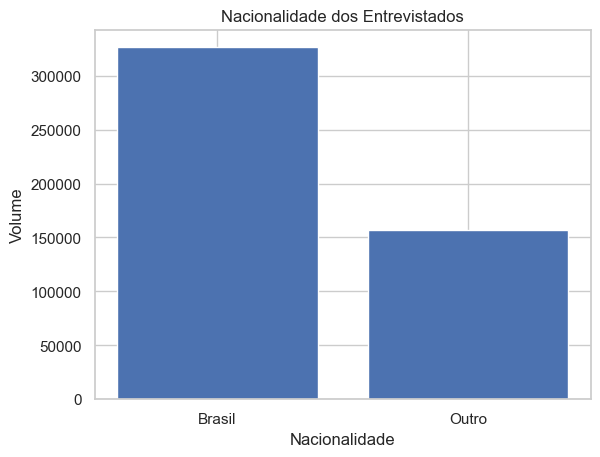

In [74]:
# simple visualização
keys, counts = np.unique(air_sat_nm["nacionalidade"], return_counts=True)
plt.bar(keys, counts)
plt.title("Nacionalidade dos Entrevistados")
plt.xlabel("Nacionalidade")
plt.ylabel("Volume")
plt.show()

# DICA!
Sempre que fizer um gráfico, não esqueça de colocar título e identificar o nome dos eixos

# DICA!
A cada nova informação, pense: o que isso quer dizer sobre meus dados?

# genero

In [67]:
air_sat_nm["GENERO DO ENTREVISTADO"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Masculino    52.8%
Feminino     47.2%
Name: GENERO DO ENTREVISTADO, dtype: object

# idade

In [68]:
air_sat_nm["IDADE DO ENTREVISTADO"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

26 a 35 anos       34.0%
36 a 45 anos       26.5%
46 a 55 anos       15.0%
18 a 25 anos       14.5%
56 a 64 anos        6.5%
Mais de 65 anos     2.4%
Não informou        0.6%
Mais de 55 anos     0.5%
Não Informou        0.0%
Name: IDADE DO ENTREVISTADO, dtype: object

<Axes: title={'center': 'Idade dos Entrevistados'}, xlabel='Idades', ylabel='Volume'>

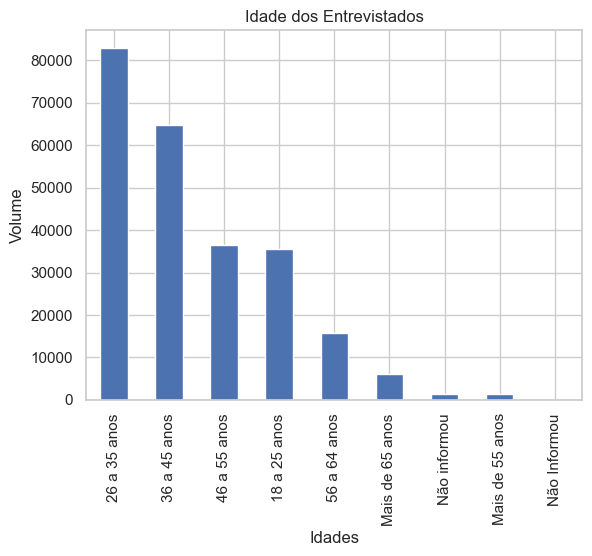

In [77]:
pd.Series(air_sat_nm["IDADE DO ENTREVISTADO"]).value_counts(sort=True).plot(kind="bar", 
                                                                             title = "Idade dos Entrevistados",
                                                                             xlabel = "Idades",
                                                                             ylabel = "Volume")

# ESCOLARIDADE

In [78]:
air_sat_nm["ESCOLARIDADE"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Superior Completo                                         32.8%
Especialização de nível superior                          14.8%
Ensino médio completo                                     13.1%
Superior Incompleto                                       11.8%
Superior completo                                          8.4%
Mestrado                                                   5.4%
Ensino médio completo (2º grau completo)                   4.9%
Doutorado                                                  1.8%
Analfabeto                                                 1.5%
Ensino fundamental completo                                1.5%
Ensino médio incompleto                                    1.5%
Ensino fundamental incompleto                              0.9%
Ensino fundamental completo (1º ao 9º ano completo)        0.6%
Ensino médio incompleto (2º grau incompleto)               0.6%
Ensino fundamental incompleto(1º ao 9º ano incompleto)     0.4%
Superior incompleto                     

<Axes: title={'center': 'Escolaridade dos Entrevistados'}, xlabel='Escolaridade', ylabel='Volume'>

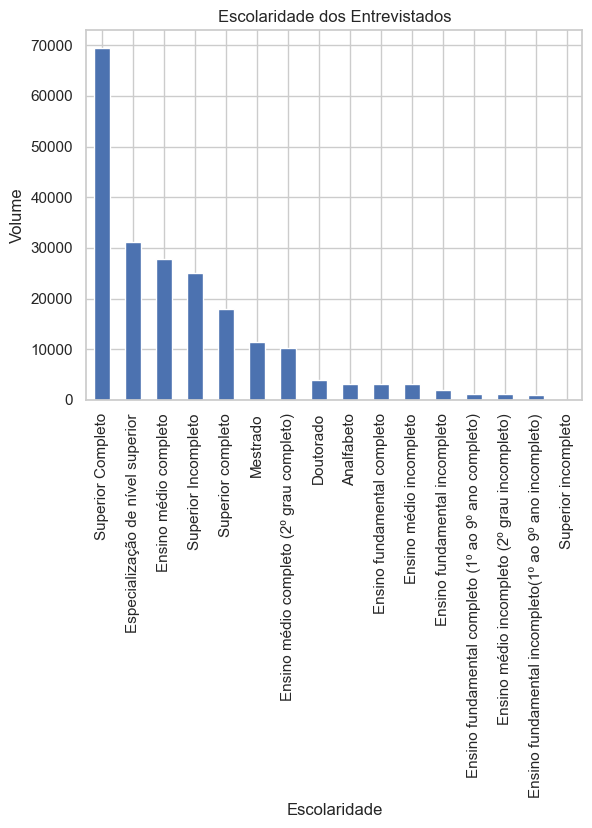

In [79]:
pd.Series(air_sat_nm["ESCOLARIDADE"]).value_counts(sort=True).plot(kind="bar", 
                                                                             title = "Escolaridade dos Entrevistados",
                                                                             xlabel = "Escolaridade",
                                                                             ylabel = "Volume")

# RENDA DO ENTREVISTADO

In [80]:
air_sat_nm["RENDA DO ENTREVISTADO"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

4 a 10 salários mínimos                                     23.4%
Não Informou                                                19.8%
10 a 20 salários mínimos                                    15.8%
2 a 4 salários mínimos                                      11.6%
Mais de 20 salários mínimos                                 10.6%
Não informou                                                10.1%
1 a 2 salários mínimos                                       4.3%
1 salário mínimo                                             1.6%
De R$ 3.992,00 a R$ 9.980,00 (4 a 10 salários mínimos)       0.7%
Até 1 salário mínimo                                         0.5%
 Não Informou                                                0.5%
De R$ 9.980,00 a R$ 19.960,00 (10 a 20 salários mínimos)     0.4%
De R$ 1.996,00 a R$ 3.992,00 (2 a 4 salários mínimos)        0.4%
Acima de R$ 19.960,00                                        0.3%
De R$ 998,00 a R$ 1.996,00 (1 a 2 salários mínimos)          0.2%
Menos de R

<Axes: title={'center': 'Renda dos Entrevistados'}, xlabel='Renda', ylabel='Volume'>

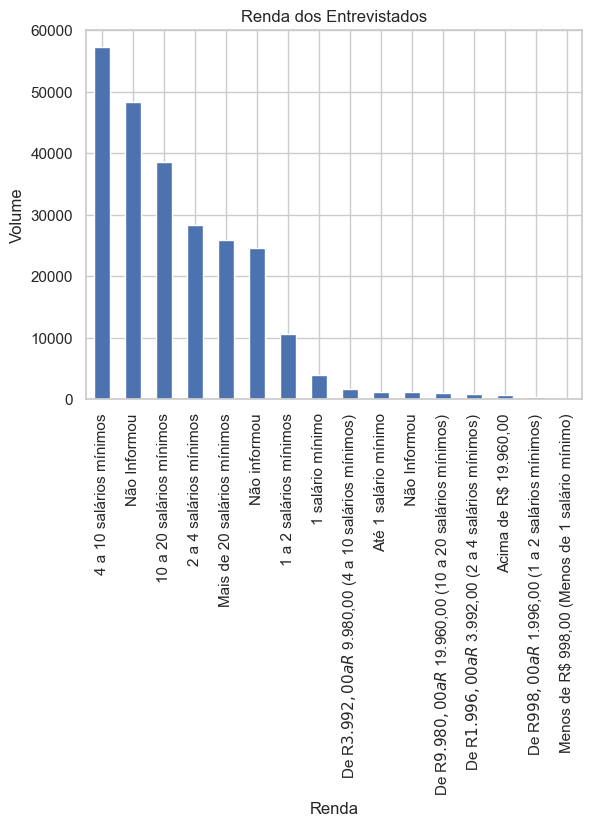

In [81]:
pd.Series(air_sat_nm["RENDA DO ENTREVISTADO"]).value_counts(sort=True).plot(kind="bar", 
                                                                             title = "Renda dos Entrevistados",
                                                                             xlabel = "Renda",
                                                                             ylabel = "Volume")

# escolaridade e renda tem ~50% em branco. O que isso pode dizer?

# MOTIVO DA VIAGEM 

In [83]:
air_sat_nm["MOTIVO DA VIAGEM"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Lazer              60.0%
Negócio            31.4%
Outro               6.6%
Lazer e Negócio     1.7%
Lazer e negócio     0.3%
lazer               0.0%
Outros              0.0%
Name: MOTIVO DA VIAGEM, dtype: object

<Axes: title={'center': 'Motivo da Viagem'}, xlabel='Motivo da Viagem', ylabel='Volume'>

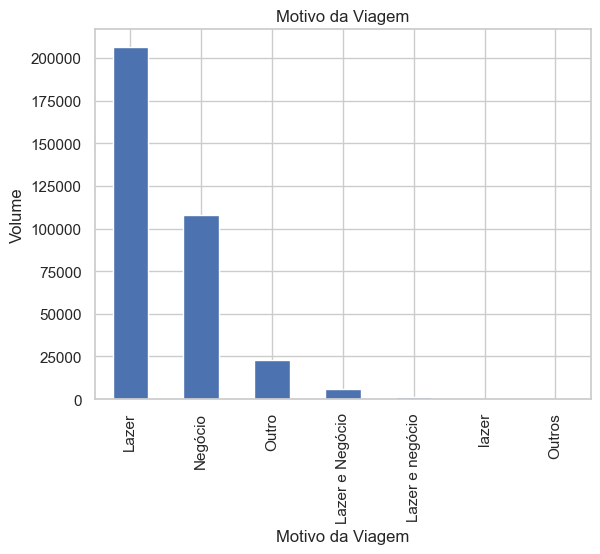

In [85]:
pd.Series(air_sat_nm["MOTIVO DA VIAGEM"]).value_counts(sort=True).plot(kind="bar", 
                                                                             title = "Motivo da Viagem",
                                                                             xlabel = "Motivo da Viagem",
                                                                             ylabel = "Volume")



# FREQUÊNCIA DE VIAGEM (últimos 12 meses) 

In [86]:
air_sat_nm["FREQUÊNCIA DE VIAGEM (últimos 12 meses)"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

0 a 2               29.0%
3 a 5               21.4%
Mais de 5           21.3%
É a primeira vez     8.9%
2 a 3 vezes          7.6%
4 a 5 vezes          4.1%
Mais de 11 vezes     3.7%
6 a 10 vezes         3.7%
mais de 5            0.3%
Name: FREQUÊNCIA DE VIAGEM (últimos 12 meses), dtype: object

<Axes: title={'center': 'Frequência de Viagem'}, xlabel='Frequência de Viagem', ylabel='Volume'>

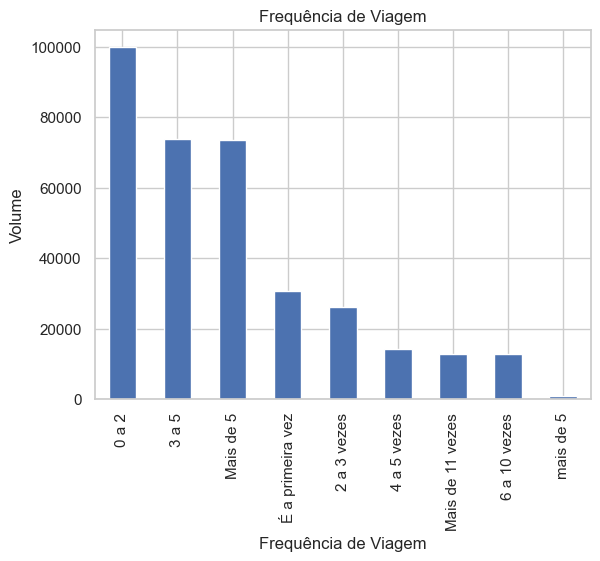

In [87]:
pd.Series(air_sat_nm["FREQUÊNCIA DE VIAGEM (últimos 12 meses)"]).value_counts(sort=True).plot(kind="bar", 
                                                                             title = "Frequência de Viagem",
                                                                             xlabel = "Frequência de Viagem",
                                                                             ylabel = "Volume")



# O que isso nos diz sobre os entrevistados?